In [90]:
import pandas as pd
from collections import Counter

In [91]:
import os
import random
import numpy as np
import pickle
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
def normalizeTargets(i,file):
    ratefile =  os.path.join(file,file+"_rate.npy")
    
    nTargets_1 =np.load(ratefile)
    
    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)
    
    norm = 'zscore'

    if(norm == 'zscore'):
        nTargets =nTargets_1- mean
        nTargets = np.divide(nTargets,std,out=np.zeros_like(nTargets),where=std!=0)
        
    else:
        nTargets = -np.log(nTargets_1)

    return nTargets[i]

In [93]:
def de_normalizeTargets(error,file='train'):
    ratefile =  os.path.join(file,file+"_rate.npy")

    nTargets_1 =np.load(ratefile)

    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)


    erro = np.dot(error,std)+mean

    '''
    erro = np.exp(-error)
    '''
    return erro

In [104]:
def SNP_WINDOW(w,r,i,file):
 
    #respectiveNormalizedTargets = [normalizeTargets(i,file)]
    #targets = np.array(respectiveNormalizedTargets)
    lis=[]
    for i in w:
            co = dict(Counter(i))
            if len(co.keys())==2:
                lis.append(co[min(co,key=co.get)]/len(i))
       
    bins = np.linspace(0, 1, 20)

    bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
    print(bin_means)
    bins= bins[1:]
    bin_means= bin_means/bin_means.sum()
    plt.bar(range(19),bin_means)
    plt.show()
    

    
    

    return bin_means

In [105]:
def __data_generation1(batchTreeIndices,file):

        haps = []
        pos = []
        rate =[]
        for treeIndex in batchTreeIndices:
            Hfilepath = os.path.join(file,str(treeIndex) + "_haps.npy")
            Pfilepath = os.path.join(file, str(treeIndex) +"_pos.npy")
            H = np.load(Hfilepath)
            P = np.load(Pfilepath)

            haps.append(H)
            pos.append(P)

        return haps,pos


            
def __getitem__1(idx,val):
    X,x1= __data_generation1([idx],val)
    return X,x1

/tmp/ipykernel_63517/2945294503.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


[11.875  0.     0.     2.375  0.     2.375  2.375  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]


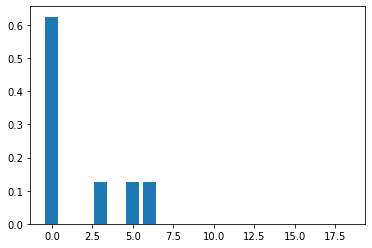

In [108]:
x,pos= __getitem__1(0,'train')

vale1 = SNP_WINDOW(x[0],pos[0],0,'train')

[3.8  2.85 2.85 0.95 0.95 1.9  0.95 1.9  2.85 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


/tmp/ipykernel_63517/2945294503.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


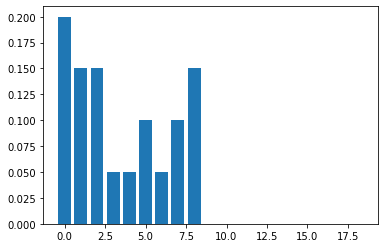

In [110]:
x,pos= __getitem__1(0,'validation')


vale1 = SNP_WINDOW(x[0],pos[0],0,'validation')

/tmp/ipykernel_63517/2945294503.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


[5.18181818 1.72727273 1.72727273 1.72727273 1.72727273 3.45454545
 0.         0.         3.45454545 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


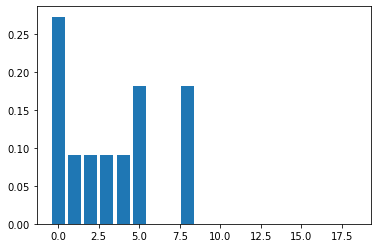

In [112]:
x,pos= __getitem__1(0,'test')

vale1 = SNP_WINDOW(x[0],pos[0],0,'test')